## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set plot style
sns.set(style = "whitegrid", palette = "muted", font_scale = 1.1)

## Load the Dataset

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/ml_da/breast-cancer-logreg/data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B' : 0})

In [10]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Exploratory Data Analysis

#### Class Distribution (Target Balance)
Check how many malignant vs benign cases exist.

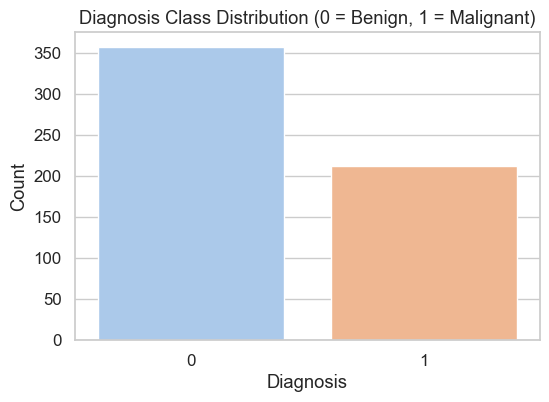

In [11]:
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'diagnosis', hue = 'diagnosis', palette = 'pastel', legend = False)
plt.title('Diagnosis Class Distribution (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [12]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### Feature Correlation with Target
Identify top correlated features to focus on during model training.

In [13]:
correlations = df.corr()['diagnosis'].sort_values(ascending = False)

In [14]:
correlations.head(10)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64

In [15]:
correlations.tail(10)

smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64

Text(0, 0.5, 'Correlation with Diagnosis')

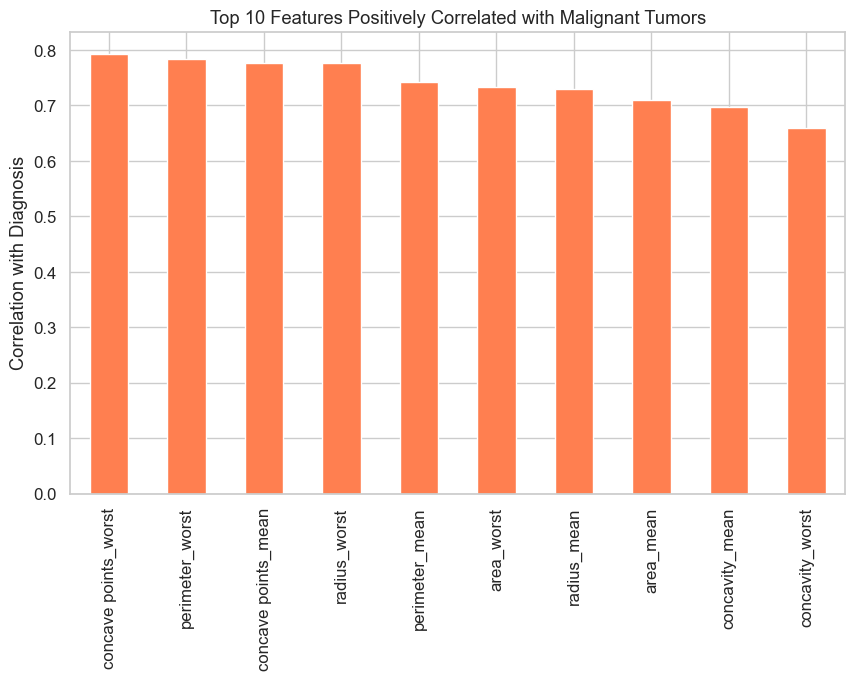

In [16]:
plt.figure(figsize = (10, 6))
correlations[1:11].plot(kind = 'bar', color ='coral')
plt.title('Top 10 Features Positively Correlated with Malignant Tumors')
plt.ylabel('Correlation with Diagnosis')

### Correlation Heatmap
Detect multicollinearity, features that are strongly correlated with each other. Avoid redundant inputs in Logistic Regression.

Text(0.5, 1.0, 'Feature Correlation Heatmap')

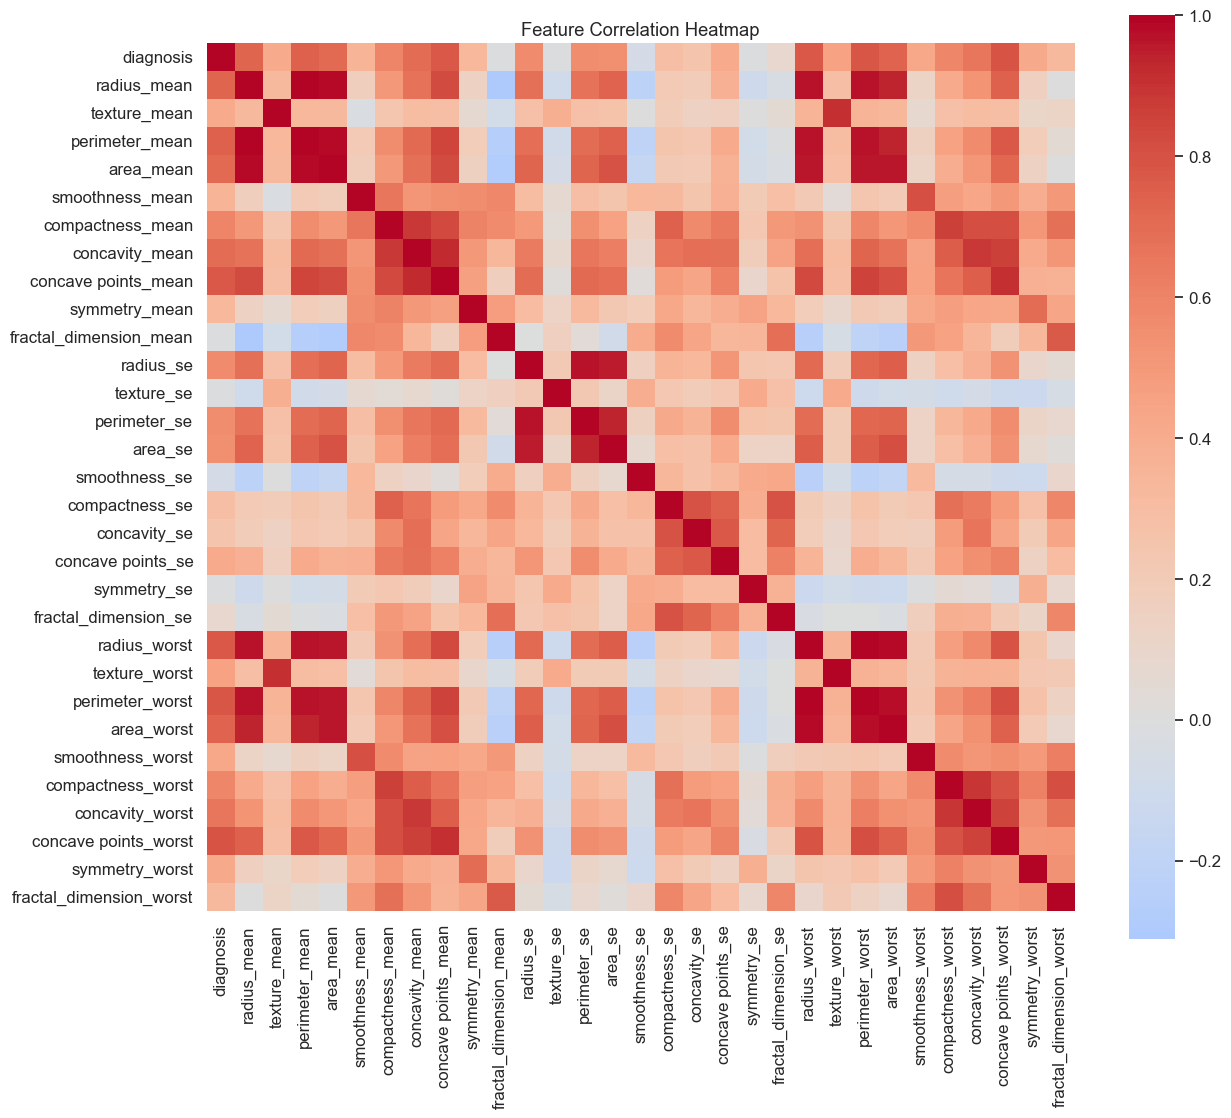

In [17]:
plt.figure(figsize = (14, 12))
sns.heatmap(df.corr(), cmap = 'coolwarm', center = 0, square = True)
plt.title('Feature Correlation Heatmap')


## Data Preprocessing + Logistic Regression Model Training

### Handle Multicollinearity

In [18]:
X = df.select_dtypes(include=["float64", "int64"]).drop(columns=["diagnosis"])

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort and display the results
print(vif_data.sort_values(by="VIF", ascending=False))

                    Feature           VIF
0               radius_mean  63306.172036
2            perimeter_mean  58123.586079
20             radius_worst   9674.742602
22          perimeter_worst   4487.781270
3                 area_mean   1287.262339
23               area_worst   1138.759252
9    fractal_dimension_mean    629.679874
29  fractal_dimension_worst    423.396723
4           smoothness_mean    393.398166
24         smoothness_worst    375.597155
21            texture_worst    343.004387
1              texture_mean    251.047108
10                radius_se    236.665738
28           symmetry_worst    218.919805
12             perimeter_se    211.396334
5          compactness_mean    200.980354
8             symmetry_mean    184.426558
6            concavity_mean    157.855046
7       concave points_mean    154.241268
27     concave points_worst    148.673180
25        compactness_worst    132.884276
26          concavity_worst     86.310362
13                  area_se     72

In [19]:
X_reduced = X.drop(columns=[
    "radius_mean",
    "perimeter_mean",
    "area_mean",
    "perimeter_worst",
    "area_worst",
    "radius_worst",
    "texture_worst", 
    "fractal_dimension_mean",
    "smoothness_mean",
    "radius_se",
    "perimeter_se",
    "concavity_mean",
    "concave points_mean",
    "compactness_mean",
    "symmetry_mean",
    "smoothness_worst",
    "fractal_dimension_worst",
    "symmetry_worst",
    "concavity_worst",
    "compactness_worst"
])


In [20]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_reduced.columns
vif_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Sort and display the results
print(vif_data.sort_values(by="VIF", ascending=False))

                Feature        VIF
6     concave points_se  18.280704
0          texture_mean  15.880853
4        compactness_se  14.715634
9  concave points_worst  11.404554
8  fractal_dimension_se  10.840567
1            texture_se  10.543607
3         smoothness_se   9.459140
7           symmetry_se   9.308373
5          concavity_se   7.920165
2               area_se   2.626150


In [23]:
X_reduced

,texture_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,concave points_worst
0,10.38,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.2654
1,17.77,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1860
2,21.25,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.2430
3,20.38,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2575
4,14.34,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,22.39,1.2560,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.2216
565,28.25,2.4630,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.1628
566,28.08,1.0750,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.1418
567,29.33,1.5950,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.2650


##### Reduction Function

In [21]:
# def reduce_multicollinearity(df, threshold = 20.0, target_col = None):
#     # Keeping only numeric features
#     X = df.select_dtypes(include = ['int64', 'float64']).copy()

#     # Drop the target column
#     if target_col and target_col in X.columns:
#         X = X.drop(columns = [target_col])

#     # Iterate and remove features with VIF > threshold
#     dropped = True
#     while dropped:
#         vif = pd.DataFrame()
#         vif["Feature"] = X.columns
#         vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#         # Find features with highest VIF
#         max_vif = vif['VIF'].max()
#         if max_vif > threshold:
#             drop_col = vif.loc[vif['VIF'].idxmax(), 'Feature']
#             X = X.drop(columns = [drop_col])
#             dropped = True
            
#     # Final VIF table after reduction
#     final_vif = pd.DataFrame()
#     final_vif["Feature"] = X.columns
#     final_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return X, final_vif

In [22]:
# X_reduced, final_vif = reduce_multicollinearity(df, threshold=20, target_col="diagnosis")

# print(final_vif.sort_values(by="VIF", ascending=False))


### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

In [37]:
# Get a data frame
X_df = pd.DataFrame(X_scaled, columns = X_reduced.columns)

In [39]:
X_df['diagnosis'] = df['diagnosis'].values
X_df

,texture_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,concave points_worst,diagnosis
0,-2.073335,-0.565265,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,2.296076,1
1,-0.353632,-0.876244,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.087084,1
2,0.456187,-0.780083,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.955000,1
3,0.253732,-0.110409,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,2.175786,1
4,-1.151816,-0.790244,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,0.729259,1
...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,0.071025,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.629151,1
565,2.085134,2.260938,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,0.733827,1
566,2.045574,-0.257371,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.414069,1
567,2.336457,0.686088,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,2.289985,1


### Train/Validation and Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [40]:
train_val_df, test_df = train_test_split(X_df, test_size = 0.2, random_state = 42)

In [41]:
train_df, val_df = train_test_split(X_df, test_size = 0.25, random_state = 42)

In [42]:
train_df.shape

(426, 11)

In [44]:
test_df.shape

(114, 11)

In [45]:
val_df.shape

(143, 11)

In [47]:
print(train_df['diagnosis'].value_counts(normalize=True))
print(val_df['diagnosis'].value_counts(normalize=True))
print(test_df['diagnosis'].value_counts(normalize=True))


diagnosis
0    0.629108
1    0.370892
Name: proportion, dtype: float64
diagnosis
0    0.622378
1    0.377622
Name: proportion, dtype: float64
diagnosis
0    0.622807
1    0.377193
Name: proportion, dtype: float64


#### Seperating Features into Input and Target

In [49]:
# Separate features and labels
X_train = train_df.drop(columns=['diagnosis'])
y_train = train_df['diagnosis']

X_val = val_df.drop(columns=['diagnosis'])
y_val = val_df['diagnosis']

X_test = test_df.drop(columns=['diagnosis'])
y_test = test_df['diagnosis']


### Model Training and Evaluation

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [75]:
# Training Accuracy
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
train_preds = model.predict(X_train)

print('Training Accuracy:', accuracy_score(y_train, train_preds))

Training Accuracy: 0.9694835680751174


Text(0.5, 1.0, 'Training Confusion Matrix')

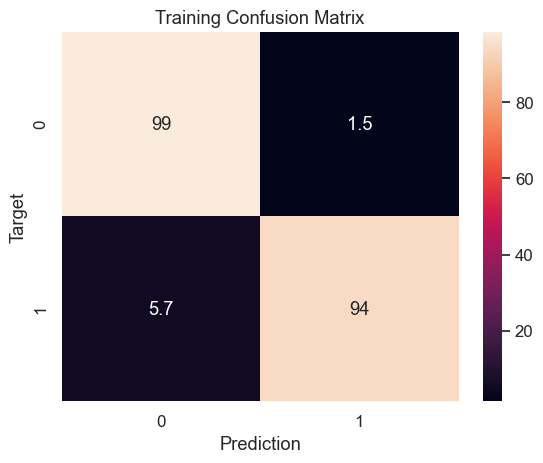

In [86]:
cf_train = confusion_matrix(y_train, train_preds, normalize = 'true') * 100
plt.figure()
sns.heatmap(cf_train, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Training Confusion Matrix')

In [87]:
cf_train

array([[98.50746269,  1.49253731],
       [ 5.69620253, 94.30379747]])

In [85]:
# Validation Accuracy
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
val_preds = model.predict(X_val)

print('Validation Accuracy:', accuracy_score(y_val, val_preds))

Validation Accuracy: 0.9790209790209791


Text(0.5, 1.0, 'Validation Confusion Matrix')

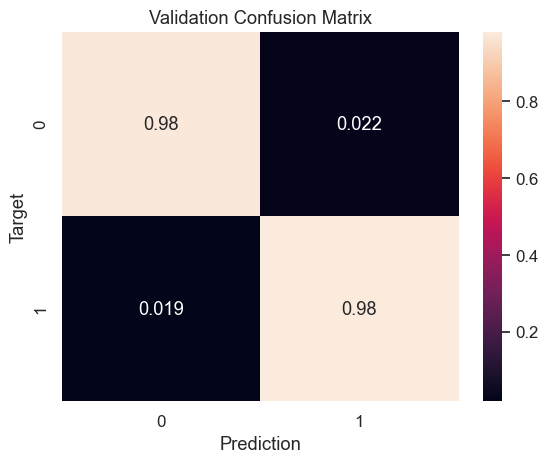

In [94]:
cf_val = confusion_matrix(y_val, val_preds, normalize = 'true')
plt.figure()
sns.heatmap(cf_val, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Validation Confusion Matrix')

In [95]:
cf_val

array([[0.97752809, 0.02247191],
       [0.01851852, 0.98148148]])

In [91]:
# Test Accuracy
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
test_preds = model.predict(X_test)

print('Validation Accuracy:', accuracy_score(y_test, test_preds))

Validation Accuracy: 0.9824561403508771


Text(0.5, 1.0, 'Test Confusion Matrix')

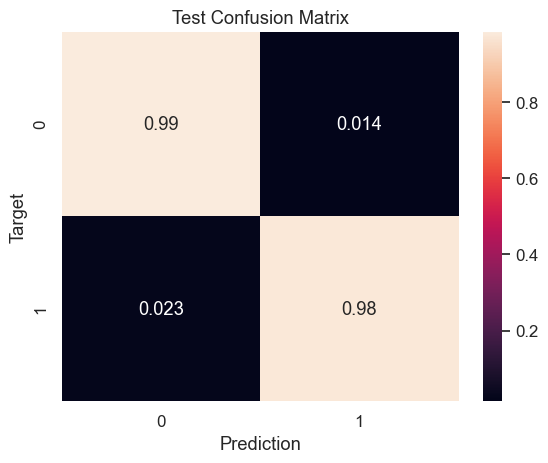

In [93]:
cf_test = confusion_matrix(y_test, test_preds, normalize = 'true')
plt.figure()
sns.heatmap(cf_test, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix')

In [96]:
cf_test

array([[0.98591549, 0.01408451],
       [0.02325581, 0.97674419]])

In [64]:
train_acc = accuracy_score(y_train, model.predict(X_train))
val_acc = accuracy_score(y_val, model.predict(X_val))
test_acc = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)


Training Accuracy: 0.9694835680751174
Validation Accuracy: 0.9790209790209791
Test Accuracy: 0.9824561403508771


#### Evaluate Classification Metrics

In [106]:
report_dict = classification_report(y_val, val_preds, output_dict = True)

In [112]:
report_df = pd.DataFrame(report_dict).transpose().round(2)
report_df

,precision,recall,f1-score,support
0,0.99,0.98,0.98,89.00
1,0.96,0.98,0.97,54.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.98,0.98,0.98,143.00
weighted avg,0.98,0.98,0.98,143.00


In [113]:
report_df.to_csv('C:/Users/HP/Downloads/ml_da/breast-cancer-logreg/reports/validation_classification_report.csv', index = True)

#### Feature Importance and Model Coefficient


In [115]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
9,concave points_worst,3.615140
2,area_se,3.367810
0,texture_mean,1.154822
5,concavity_se,0.671666
3,smoothness_se,0.211849
7,symmetry_se,0.074165
1,texture_se,-0.205139
4,compactness_se,-0.323611
6,concave points_se,-0.639422
8,fractal_dimension_se,-0.735651


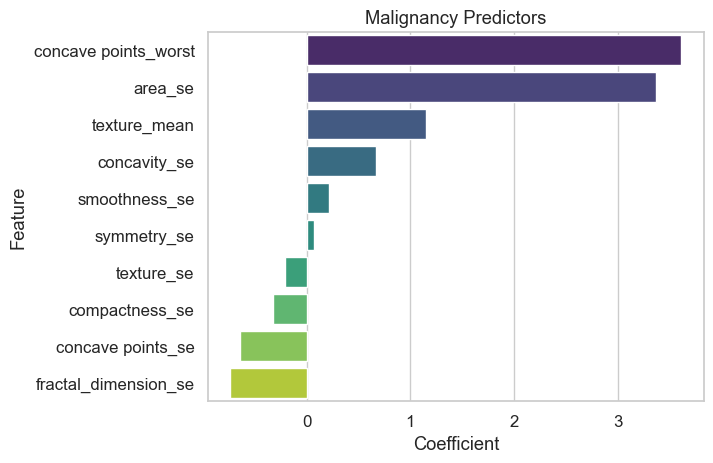

In [118]:
plt.figure()
sns.barplot(data = coef_df, x = 'Coefficient', y = 'Feature',legend = False, hue = 'Feature', palette = 'viridis')
plt.title("Malignancy Predictors");

### Saving and Loading Trained Models

In [97]:
import joblib

In [99]:
joblib.dump(model, 'C:/Users/HP/Downloads/ml_da/breast-cancer-logreg/models/log_reg_model.pkl')
joblib.dump(scaler, 'C:/Users/HP/Downloads/ml_da/breast-cancer-logreg/models/scaler.pkl')

['C:/Users/HP/Downloads/ml_da/breast-cancer-logreg/models/scaler.pkl']